Sales Data CSV file created successfully!
Initial Data:
   Order Date  Product     Category  Sales  Quantity  Profit
0  2023-01-01   Laptop  Electronics   1200         1     100
1  2023-01-02    Phone  Electronics    800         2      50
2  2023-01-03    Chair    Furniture    150         4      30
3  2023-02-05   Tablet  Electronics    600         3      80
4  2023-02-10  Monitor  Electronics    300         2      20
  Order Date  Product     Category  Sales  Quantity  Profit  Month  Year
0 2023-01-01   Laptop  Electronics   1200         1     100      1  2023
1 2023-01-02    Phone  Electronics    800         2      50      1  2023
2 2023-01-03    Chair    Furniture    150         4      30      1  2023
3 2023-02-05   Tablet  Electronics    600         3      80      2  2023
4 2023-02-10  Monitor  Electronics    300         2      20      2  2023


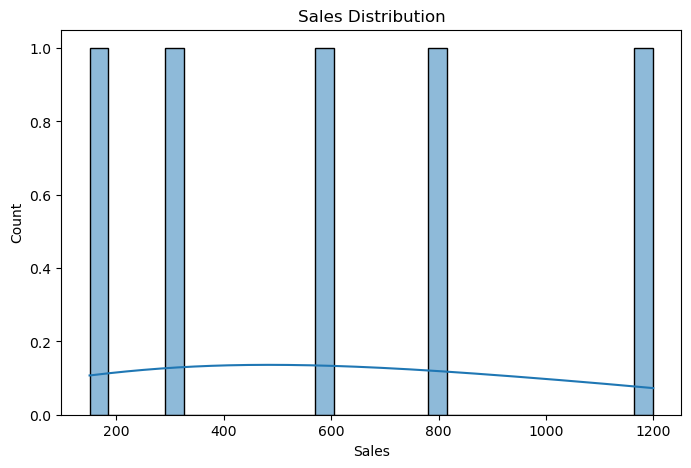

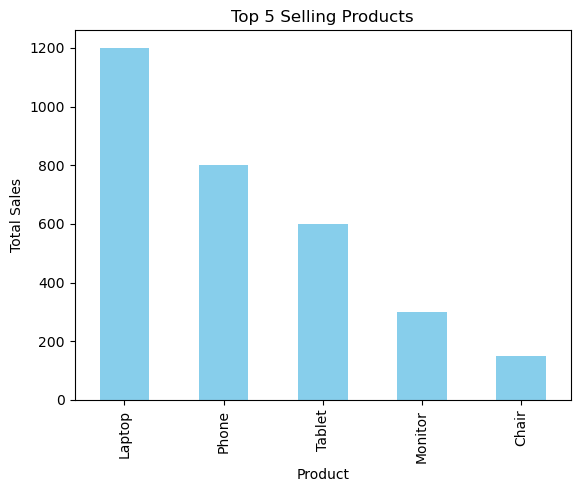

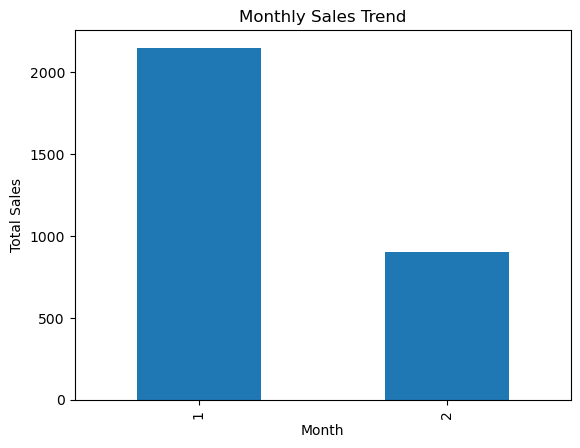

MAE: 219.25373134328356
MSE: 48072.19870795277
RMSE: 219.25373134328356


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Sample Sales Data
data = {
    "Order Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-02-05", "2023-02-10"],
    "Product": ["Laptop", "Phone", "Chair", "Tablet", "Monitor"],
    "Category": ["Electronics", "Electronics", "Furniture", "Electronics", "Electronics"],
    "Sales": [1200, 800, 150, 600, 300],
    "Quantity": [1, 2, 4, 3, 2],
    "Profit": [100, 50, 30, 80, 20]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("sales_data.csv", index=False)

print("Sales Data CSV file created successfully!")
# Load Dataset
df = pd.read_csv("sales_data.csv")
print("Initial Data:")
print(df.head())

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
print(df.head())
# Handle Missing Values
df.fillna(0, inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

# Top 5 Selling Products
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar", color='skyblue')
plt.title("Top 5 Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

# Monthly Sales Trend
df.groupby("Month")["Sales"].sum().plot(kind="bar")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()
# Feature Engineering
df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100

# Predictive Modeling: Sales Prediction
X = df[['Quantity', 'Profit']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))